전이학습에 필요한 파이썬 라이브러리 임포트 하기 

In [ ]:
from tensorflow.keras import datasets

전이학습에 사용할 CIFAR10 데이터셋을 다운로드 하기 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


CIFAR10 데이터셋 라벨을 정한다. 

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

다운받은 CIFAR10 데이터를 몇가지 둘러본다. 

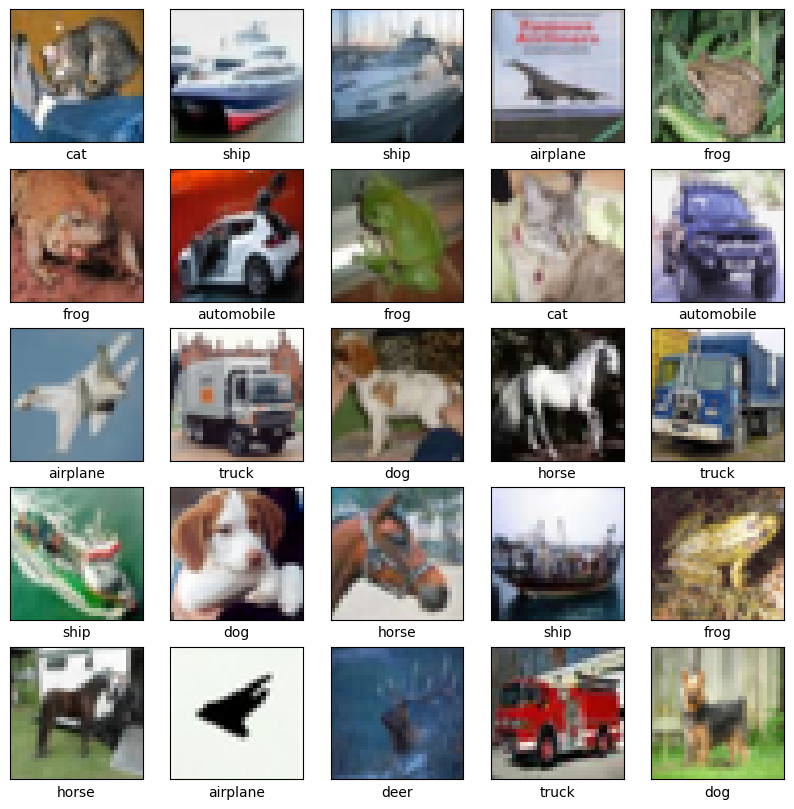

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

pre-trained 신경망 모델을 가져와서 데이터를 넣어서 분류가 잘 되는지 확인한다. 
include_top = True로 설정해 분류기를 그대로 가져온다. 기존 ResNet이 갖고 있던 1000개 class를 분류하는 분류기에서 이미지 데이터를 입력받아 분류한다.
weights = 'imagenet'을 통해 imagenet에 사용된 사전학습시의 weights를 가져온다.
input_shape은 이번 모델링이 최종 ResNet 모델만을 사용하는 것이기 때문에 ResNet의 Input 사이즈인 224x224와 3개 채널로 맞춰논다.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')

102967424/102967424 [==============================] - 0s 0us/step


pre-trained 모델의 구조를 살펴 본다

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

모델을 컴파일한다. 

In [ ]:
base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

5개의 테스트 이미지를 모델에 feed-forward해서 모델의 성능을 판단해 본다. 

In [ ]:
import tensorflow as tf
for i in range(100):
  inputs = test_images[i]                 # Test_images의 i번째 이미지에 대한 평가 
  inputs = tf.expand_dims(inputs, axis=0) # ResNet이 원하는 이미지 차원은 (None, 224, 224, 3)이므로 차원 하나를 더 추가해준다.
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs) # ResNet의 인풋사이즈에 맞춰준다. > 안맞춰도 돌아가지만 성능을 위해
  x = tf.keras.applications.resnet50.preprocess_input(x)  # 이전단계에서 안맞춰도 돌아가는 이유 > 바로 이 전처리 모듈이 있어서 알아서 맞춰주긴함
  base_model.evaluate(x, test_labels[i])  # 모델의 성능을 파악해본다.

1/1 [==============================] - 0s 196ms/step - loss: 20.7814 - accuracy: 0.0000e+00


이미지 분류를 실행해 본다. 

35363/35363 [==============================] - 0s 0us/step


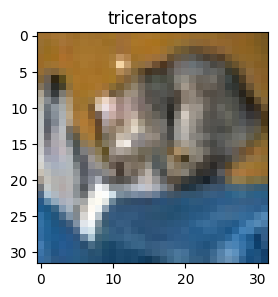

1/1 [==============================] - 0s 128ms/step


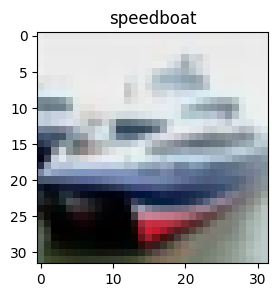

1/1 [==============================] - 0s 144ms/step


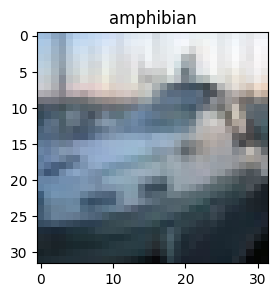

1/1 [==============================] - 0s 151ms/step


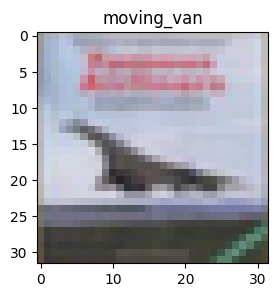

1/1 [==============================] - 0s 133ms/step


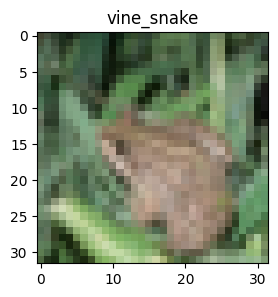

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

for i in range(5):

  inputs = test_images[i]
  inputs = tf.expand_dims(inputs, axis=0)
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
  x = tf.keras.applications.resnet50.preprocess_input(x) 

  preds = base_model.predict(x)  # ResNet Model의 예측진행

  # 예측 실행
  fig= plt.figure(figsize=(3,3))
  plt.title(decode_predictions(preds, top=1)[0][0][1])# 타이틀에 예측 명 1순위를 넣는다.
  plt.imshow(test_images[i])	# 이미지는 
  plt.show();